<a href="https://colab.research.google.com/github/mohammedpithapur/Liner-regression-from-scratch-/blob/main/Liner_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
data=pd.read_csv('house-prices.csv')
x = data["area"]
y = data["price"]

# keep original and add a new normalized column
data["area_norm"] = (x - np.mean(x)) / np.std(x)

x = data["area_norm"]
data

,area,price,area_norm
0,1567,177067.50,-1.246492
1,3345,511748.20,0.329887
2,3722,404096.67,0.664136
3,2783,357916.31,-0.168383
4,2949,362409.54,-0.021208
...,...,...,...
995,3442,434336.51,0.415887
996,1530,211400.14,-1.279296
997,2102,172513.03,-0.772160
998,1551,200701.84,-1.260677


Text(0, 0.5, 'Price (in $)')

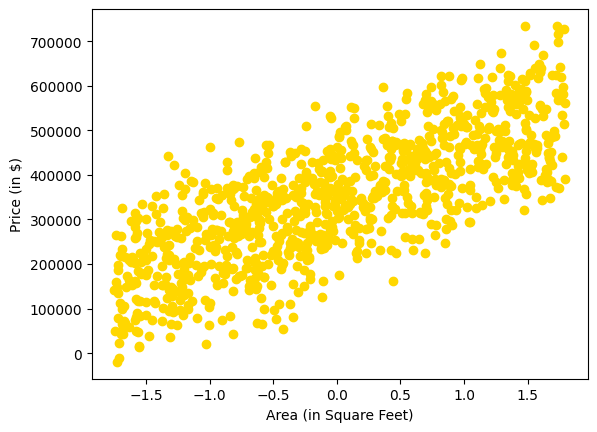

In [110]:
plt.scatter(data["area"], data["price"], color="gold")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [111]:
def fwb(w,b,x):
  x=np.array(x)

  m=x.shape[0]
  f_wb=np.zeros(m)
  for i in range(m):
    f_wb[i]=w*x[i]+b
  return f_wb

In [112]:
def cost(x,y,w,b):
  x=np.array(x)
  y=np.array(y)
  m=x.shape[0]
  cost=0
  for i in range(m):
    fwb=w*x[i]+b
    cost+=(fwb-y[i])**2
  cost=cost/m
  return cost


In [113]:
def gdequ(x,y,w,b):
  x=np.array(x)
  y=np.array(y)
  m=x.shape[0]
  dj_dw=0
  dj_db=0
  for i in range(m):
    fwb=w*x[i]+b
    dj_dw+=(fwb-y[i])*x[i]
    dj_db+=(fwb-y[i])
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_db,dj_dw

In [148]:
def gradient_desent(x,y,w,b,alpha,iter,cost,gd):
  x=np.array(x)
  y=np.array(y)
  m=x.shape[0]
  finalw=w
  finalb=b
  jhis=[]
  phis=[]
  for i in range(iter):
    db,dw=gd(x,y,w,b)
    finalw=finalw-alpha*dw
    finalb=finalb-alpha*db
    if i<100000:
      jhis.append(cost(x,y,finalw,finalb))
      phis.append([w,b])
    if i%math.ceil(iter/10)==0:
      print(f"Iteration {i}: Cost {jhis[-1]} ",
            f"dj_dw: {dw}, dj_db: {db}  ",
            f"w: {finalw}, b:{finalb}")
  return finalw,finalb,jhis,phis

In [231]:
w=0
b=0
alpha=0.00004
fw,fb,j,p=gradient_desent(data["area_norm"],data["price"],w,b,alpha,26000,cost,gdequ)
print(f"(w,b) found by gradient descent: ({fw},{fb})")

Iteration 0: Cost 141367972530.68396  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 4.358123085547049, b:13.9252808388
Iteration 2600: Cost 115130459999.4605  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 11335.478145507876, b:36219.655461718816
Iteration 5200: Cost 91771445826.02682  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 22666.598167932825, b:72425.3856425919
Iteration 7800: Cost 71290930010.37846  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 33997.71819035988, b:108631.11582346496
Iteration 10400: Cost 53688912552.51571  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 45328.83821278694, b:144836.84600433803
Iteration 13000: Cost 38965393452.438576  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 56659.958235214, b:181042.5761852111
Iteration 15600: Cost 27120372710.147156  dj_dw: -108953.07713867624, dj_db: -348132.02096999995   w: 67991.07825764106, b:217248.30636608417
Iteration 18200: Cost 181

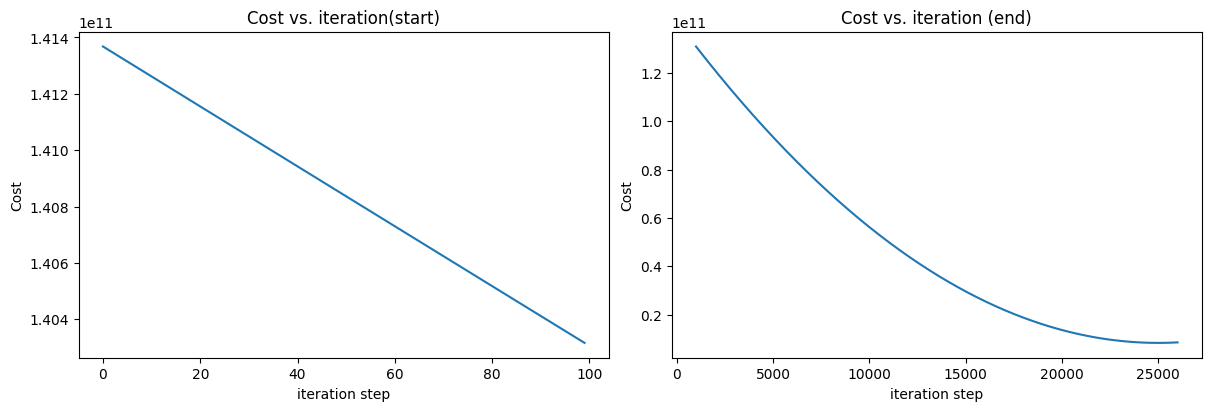

In [232]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j[:100])
ax2.plot(1000 + np.arange(len(j[1000:])), j[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [240]:
test_areas = [1200, 2500, 3500, 4500]

# Predict prices
for area in test_areas:
    predicted_price = fw * area + fb
    print(f"Area: {area}, Predicted Price: {predicted_price:.2f}")

Area: 1200, Predicted Price: 136335497.57
Area: 2500, Predicted Price: 283640057.86
Area: 3500, Predicted Price: 396951258.09
Area: 4500, Predicted Price: 510262458.31


Text(0, 0.5, 'Price (in $)')

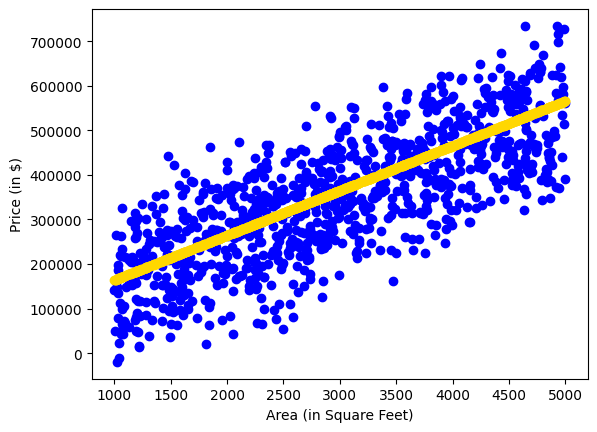

In [239]:
a=fwb(fw,fb,x)

plt.scatter(data["area"], data["price"], color="blue")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")
plt.scatter(data["area"], a, color="gold")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")